<a href="https://colab.research.google.com/github/apchavezr/16.-Aprendizaje-Profundo-para-Ciencia-de-Datos/blob/main/CIFAR10_CNN_Educativo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clasificación de imágenes con CNN en Keras usando el conjunto CIFAR-10

Este cuaderno implementa un ejercicio educativo paso a paso para la clasificación de imágenes usando redes neuronales convolucionales (CNN) con el conjunto de datos **CIFAR-10**. El conjunto contiene 60.000 imágenes en color de 32x32 píxeles divididas en 10 clases.

Se cubren las siguientes etapas:

1. Carga y normalización de datos
2. Definición de la arquitectura de la red
3. Regularización con Dropout
4. Aumentación de datos con `ImageDataGenerator`
5. Entrenamiento y evaluación del modelo


In [5]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np


In [6]:
# Cargar datos
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalizar píxeles entre 0 y 1
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# One-hot encoding de las etiquetas
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Mostrar forma de los datos
x_train.shape, y_train.shape


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


((50000, 32, 32, 3), (50000, 10))

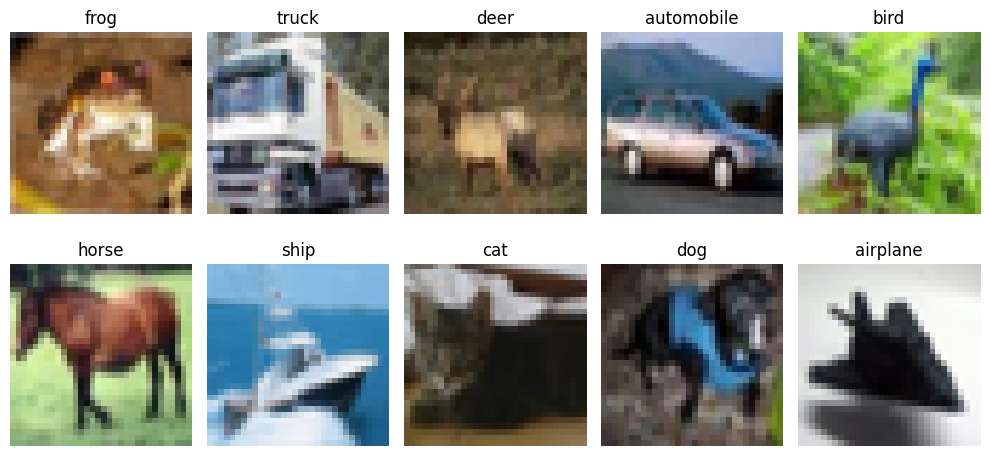

In [11]:
# Mostrar 10 imágenes representativas (una por clase)

# Define class names for CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10, 5))
shown_classes = set()
i = 0
while len(shown_classes) < 10 and i < len(x_train):


    label = np.argmax(y_train[i])
    if label not in shown_classes:
        plt.subplot(2, 5, len(shown_classes) + 1)
        plt.imshow(x_train[i])
        plt.title(class_names[label])
        plt.axis('off')
        shown_classes.add(label)
    i += 1

plt.tight_layout()
plt.show()

In [12]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))  # regularización
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 167,562 (654.54 KB)

 Trainable params: 167,562 (654.54 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

datagen.fit(x_train)


In [14]:
history = model.fit(datagen.flow(x_train, y_train, batch_size=64),
                    epochs=2,
                    validation_data=(x_test, y_test))# cambia a epochs=10


Epoch 1/2


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 99s 123ms/step - accuracy: 0.3045 - loss: 1.8887 - val_accuracy: 0.5031 - val_loss: 1.3766
Epoch 2/2
782/782 ━━━━━━━━━━━━━━━━━━━━ 94s 120ms/step - accuracy: 0.4808 - loss: 1.4422 - val_accuracy: 0.5823 - val_loss: 1.1721


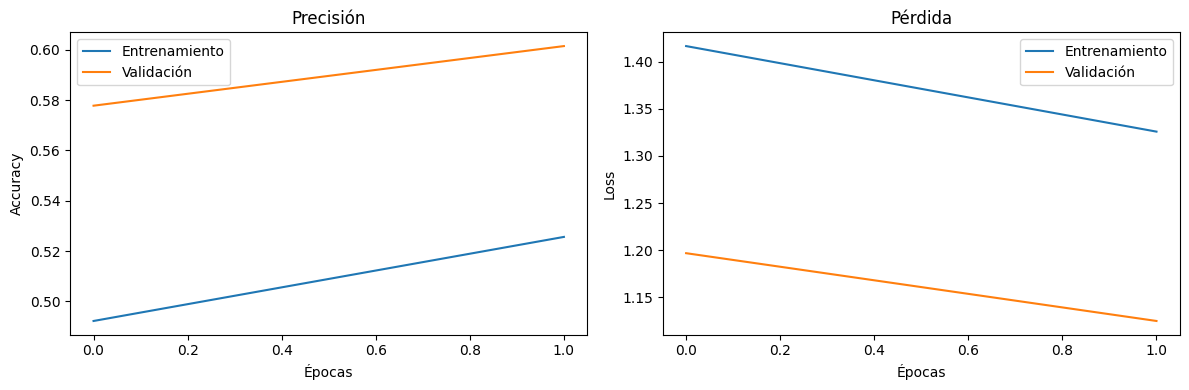

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión')
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


### Gráfico de Precisión (Accuracy)

* **Línea azul (entrenamiento):** muestra una precisión inicial cercana al 49% que aumenta levemente hacia el 52%.
* **Línea naranja (validación):** parte de una precisión superior (alrededor del 58%) y se incrementa hasta aproximadamente 60%.

**Interpretación:**

* Es inusual que la precisión en validación sea **mayor que en entrenamiento** desde el inicio. Esto puede deberse a:

  * **Regularización fuerte** (como Dropout) que afecta más al entrenamiento.
  * O simplemente a una **variación natural** durante las primeras épocas cuando el modelo aún no ha convergido.
* Como solo hay una época, no se puede observar aún una tendencia clara de aprendizaje o sobreajuste.


### Gráfico de Pérdida (Loss)

* **Línea azul (entrenamiento):** comienza con una pérdida en torno a 1.41 y disminuye hacia 1.33.
* **Línea naranja (validación):** arranca cerca de 1.20 y baja hacia 1.13.

**Interpretación:**

* Al igual que con la precisión, la pérdida en validación es menor que en entrenamiento.
* Esto puede deberse a:

  * **Muestras en validación más fáciles de clasificar**, o
  * Una **representación aleatoria ventajosa** del conjunto de validación.



### Conclusiones preliminares

1. **El modelo muestra señales iniciales de aprendizaje**, con mejoras tanto en precisión como en reducción de pérdida en ambas curvas.
2. **No se observa sobreajuste** todavía, ya que la pérdida en validación continúa disminuyendo.
3. Es necesario **entrenar durante más épocas** para evaluar el comportamiento a largo plazo del modelo, identificar tendencias y ajustar hiperparámetros.




### Recomendaciones pedagógicas

* Continuar el entrenamiento al menos por 10–20 épocas para observar estabilidad y posibles indicios de sobreajuste.
* Incluir curvas de aprendizaje completas en sesiones de análisis comparativo entre distintos modelos (con y sin data augmentation, regularización, etc.).
* Fomentar la discusión con estudiantes sobre por qué la precisión en validación podría ser inicialmente más alta.